## Trabajo Visualización de datos UDD:

Objetivos:


Alumnos:

| Alumno | Email |
|--------|-------|
|Carolina Hoffman | chofmman@udd.cl |
|Wilder Prado     | wilderhp@gmail.com |
|Effry Vigorena   | effryvg@gmail.com |
|Felipe Guzmán    | felipeguzmanv@gmail.com|





## EVALUACIÓN DE LA VITAMINA D EN CHILE DESDE ARICA A PUERTO MONTT ENTRE 2018 Y 2021

### La vitamina D juega un papel clave para prevenir los trastornos esqueléticos y cardiovasculares, diferentes tipos cáncer, enfermedades del sistema nervioso central, enfermedades reproductivas, infecciones y trastornos autoinmunes y dermatológicos. Las dos fuentes principales de vitamina D son la exposición al sol y la ingesta oral, incluida la suplementación y la ingesta dietética. Sin embargo, muchas dietas son bastante pobres en esta vitamina.
### Múltiples factores están relacionados con el estado de la vitamina D, como la edad, el índice de masa corporal, la actividad física, la ingesta de alcohol y variantes genéticas del receptor de la vitamina D.
### El Laboratorio Bionet, que cuenta con sucursales de Arica a Puerto Montt, proporcionó los datos de todos los exámenes realizados en sus centros de atención desde el 2018 al 2021. Estos datos conformarán la muestra que permitirá revisar de manera gráfica la concentración de la Vitamina D.

In [1]:
## Librerias

import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib.patches import ConnectionPatch
from matplotlib.text import OffsetFrom
import matplotlib.image as image



import plotly as px
import plotly.graph_objs as go
import plotly.express as px
import ipywidgets as widgets
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')




In [2]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.2


In [3]:
## Data a utilizar

'''
Archivos de mapa (shape)
'''
chile_pol = gpd.read_file('../shape_chile/chile_pol_join_8_16.shp')
'''
Archivos de Vitamina D
'''
#data = pd.read_csv("DATOS ADD_VISUALIZACION.CSV", decimal=',')
data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv",sep=';', decimal=',')
#datahttps://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv



## I. Introducción

### El riesgo de deficiencia de vitamina D ocurre en todas las etapas de la vida, incluso durante el embarazo, en bebés y niños, así como en adultos y personas mayores. Se pensaba que la deficiencia de vitamina D había sido superada, pero ahora se reconoce que más del 50% de la población mundial está en riesgo de sufrir deficiencia de vitamina D4. Este riesgo, (sobretodo en niños/as y adolescentes) se incrementa con el sobrepeso y obesidad, así como vivir en latitudes que superan los 40º (por ejemplo, en nuestro país, al sur de Valdivia), o con escasa luz solar, como ocurre en el invierno chileno, y especialmente en las zonas australes.

## II. Revisión de los datos de Vitamina D por año y estacionalidad.

### Varios estudios en población occidental han reportado previamente una mayor prevalencia de hipovitaminosis D en las estaciones de menor luminosidad, lo que es concordante con nuestros resultados, pese a lo anterior, la prevalencia de deficiencia de vitamina D fue muy alta en todas las estaciones incluidas las de mayor luminosidad.
### Estos gráficos muestran cómo el nivel de Vitamina D va disminuyendo hacia el invierno producto de la escasa luz solar producida en esa estación. Esto ocurre en todos los años analizados. Otro efecto que se puede apreciar es el efecto pandemia entre los años 2020 y 2021 que decae la concentración de vitamina D en todas sus estaciones.

In [4]:
data.columns = data.columns.str.upper()
#data.head(5)

Grafico_estaciones=data[['AÑO','ESTACIONES_AÑO','VITAMINA D']]#list(Grafico_wpp)
Grafico_estaciones=Grafico_estaciones.groupby(['AÑO','ESTACIONES_AÑO']).agg({'VITAMINA D':'mean'})

Grafico_estaciones=Grafico_estaciones.reset_index()
# Grafico_estaciones

CONDICIONES=[Grafico_estaciones['ESTACIONES_AÑO']=='VERANO',
             Grafico_estaciones['ESTACIONES_AÑO']=='OTOÑO',
             Grafico_estaciones['ESTACIONES_AÑO']=='INVIERNO',
             Grafico_estaciones['ESTACIONES_AÑO']=='PRIMAVERA'           
            ]
RESPUESTA=[1,2,3,4]
Grafico_estaciones['ESTACIONES_ORDEN']=np.select(CONDICIONES,RESPUESTA)
# Grafico_estaciones
Grafico_estaciones=Grafico_estaciones.sort_values(by=['AÑO','ESTACIONES_ORDEN'],ascending=[True,True])
Grafico_estaciones=Grafico_estaciones.loc[:,['AÑO','ESTACIONES_AÑO','VITAMINA D']]


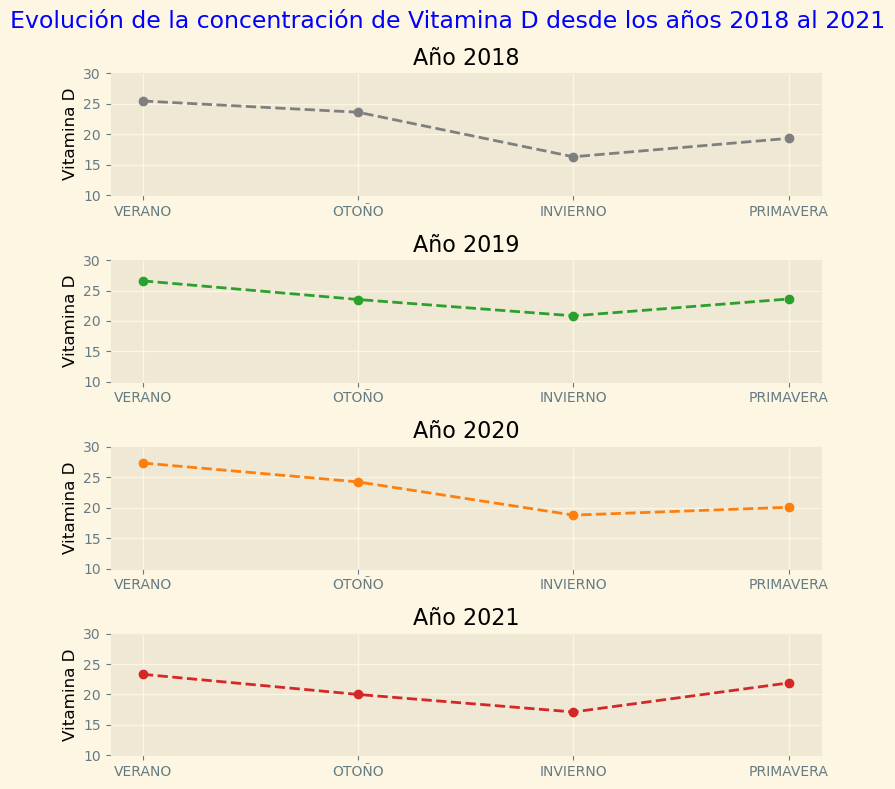

In [5]:
with plt.style.context('Solarize_Light2'): #dark_background
    fig, ax = plt.subplots(4, 1,figsize=(8,8),sharey = True, constrained_layout=True, )
    #plt.ylabel('vitamina D (ng/mL)')
#a=np.linspace(0,10,10)
    Estaciones = ['VERANO', 'OTOÑO', 'INVIERNO', 'PRIMAVERA']
    Vitamina_D = {'2018':Grafico_estaciones.iloc[:4,2:], '2019':Grafico_estaciones.iloc[4:8,2:],
                    '2020':Grafico_estaciones.iloc[8:12,2:], '2021':Grafico_estaciones.iloc[12:16,2:]}

    ax[0].plot(Estaciones, Vitamina_D['2018'], color = 'tab:grey', marker='o', linestyle='dashed')
    ax[1].plot(Estaciones, Vitamina_D['2019'], color = 'tab:green',marker='o',linestyle='dashed')
    ax[2].plot(Estaciones, Vitamina_D['2020'], color = 'tab:orange',marker='o',linestyle='dashed')
    ax[3].plot(Estaciones, Vitamina_D['2021'], color = 'tab:red',marker='o',linestyle='dashed')
    ax[0].set_title("Año 2018")
    ax[1].set_title("Año 2019")
    ax[2].set_title("Año 2020")
    ax[3].set_title("Año 2021")
#ax[0,0]annotate(EstacionesVitamina_D['2018']=(8, 0))
# ax.annotate("Sine", xy=(8, 0),
# xycoords='data', xytext=(10.5, 0),
# textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
#ax.set_xlim(0, 4)
#ax[0,0].xaxis.grid
    ax[0].set_ylim(10, 30)
    ax[0].set_ylabel('Vitamina D', color='black')
    ax[1].set_ylabel('Vitamina D', color='black')
    ax[2].set_ylabel('Vitamina D', color='black')
    ax[3].set_ylabel('Vitamina D', color='black')
    
    
#ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
#ax.legend(loc = 'upper right')
    plt.suptitle('Evolución de la concentración de Vitamina D desde los años 2018 al 2021',fontsize=17, color='b')
    
    fig.tight_layout()
plt.show()

## III. Variación de la concentración de Vitamina D entre Arica y Puerto Montt

### La mayoría de los seres humanos dependen del sol para su requerimiento de vitamina D. El pigmento de la piel, el uso de protector solar, el envejecimiento, la hora del día, la estación y la latitud pueden afectar la síntesis de previtamina D3. Los resultados medidos en regiones de mayor latitud (más cerca de la línea del ecuador) encontramos mayores concentraciones de Vitamina D en la población.

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv",sep=';', decimal=',')

In [7]:
# Colores a ocupar en Macrozonas:
color=['#C62828', '#C62828', '#283593', '#FF9800', '#283593', '#C62828', '#283593',]
# colores Anios
color_anios = ['#CFD8DC','#419D57','#FBC599','#FF3333']

In [8]:
## orden de norte a sur
index_=[15,1,2,3,4,5,13,6,7,8,9,14,10]

In [9]:
## Limpieza de datos mapa
## Rotación del mapa
center = chile_pol["geometry"].iloc[0].centroid
chile_pol.geometry = chile_pol.rotate(96, origin=center)
chile_pol['centroide'] = chile_pol.geometry.centroid
chile_pol['X']= chile_pol.centroide.x
chile_pol['Y']= chile_pol.centroide.y

## Asignación de colores mapa

chile_pol['color'] = chile_pol.MacroZona.map(lambda x: color[x-1])
## Orden de norte a sur
chile_pol.codreg=chile_pol.codreg.astype(int)

# chile_pol.head(2)

In [10]:
## Preparación de data para grafico de tendencia

nombres = {
   ' SANTIAGO': 'Región Metropolitana de Santiago',
   ' LA SERENA':'Región de Coquimbo',
   ' VALDIVIA': 'Región de Los Ríos',
   ' ANTOFAGASTA': 'Región de Antofagasta',
   ' PUERTO MONTT': 'Región de Los Lagos',
   ' ILLAPEL':'Región de Coquimbo',
   ' RANCAGUA':"Región del Libertador General Bernardo O'Higgins",
   ' CONCEPCION': 'Región del Biobío',
   ' OVALLE':'Región de Coquimbo',
   ' LOS ANDES': 'Región de Valparaíso',
   ' VIÑA DEL MAR':'Región de Valparaíso',
   ' VALLENAR':'Región de Atacama',
   ' TEMUCO':'Región de La Araucanía',
   ' COPIAPO':'Región de Atacama',
   ' ARICA':'Región de Arica y Parinacota',
   ' CALAMA':'Región de Antofagasta', 
   ' IQUIQUE':'Región de Tarapacá',
   'TALCA': 'Región del Maule'
}
codigos = {
   ' SANTIAGO': 13,
   ' LA SERENA':4,
   ' VALDIVIA': 14,
   ' ANTOFAGASTA': 2,
   ' PUERTO MONTT': 10,
   ' ILLAPEL':4,
   ' RANCAGUA':6,
   ' CONCEPCION': 8,
   ' OVALLE':4,
   ' LOS ANDES': 5,
   ' VIÑA DEL MAR':5,
   ' VALLENAR':3,
   ' TEMUCO':9,
   ' COPIAPO':3,
   ' ARICA':15,
   ' CALAMA':2, 
   ' IQUIQUE':1,
   'TALCA': 7
}
data_ = data
data_['nom_reg'] = data_.LABORATORIO.map(lambda x: nombres.get(x))
data_['cod_reg'] = data_.LABORATORIO.map(lambda x: codigos.get(x))

data__ = data_.pivot_table(index='nom_reg',columns='Año', values='VITAMINA D', aggfunc={'VITAMINA D':np.mean}).reset_index().set_index('nom_reg')
data__ = pd.merge(data__, chile_pol[['nom_reg','codreg','X']], how='left', left_on='nom_reg', right_on='nom_reg')
data__=data__.set_index('codreg')
data__=data__.loc[index_,:]


data_plot =data__[['X',2018,2019,2020,2021]].set_index('X').unstack().reset_index().rename(columns={'level_0':'Año',0:'Promedio'})
data_plot = pd.merge(
    left = data_plot,
    right = chile_pol[['X','Y']],
    left_on = 'X',
    right_on= 'X',
    how='left'
)

temperaturas = pd.read_csv('../shape_chile/temperatura/mediaxregion.csv', names = [
 'Año',
 'estaciones',
 'promedio_temp'
  ], skiprows=1)

temperaturas = temperaturas.reset_index()
data_plot = data_plot.reset_index()
data_plot = pd.merge(
    left= data_plot,
    right = temperaturas, 
    left_on = 'index',
    right_on = 'index',
    how='left'
)
data_plot = data_plot[['Año_x', 'X', 'Promedio', 'Y', 'promedio_temp']]
data_plot = data_plot.rename(columns={

    'Año_x' : 'Año'
    
})
data_plot = pd.merge(
    left= data_plot,
    right= chile_pol[['nom_reg', 'X', 'codreg']],
    left_on = 'X',
    right_on = 'X'
)
temperaturas_prom = data_plot[['codreg', 'promedio_temp']].groupby(by=['codreg']).agg('mean','promedio_temp').reset_index()
temperaturas_prom = temperaturas_prom.set_index('codreg')
# temperaturas_prom = temperaturas_prom.set_index('codreg')
temperaturas_prom = temperaturas_prom.loc[index_,:].reset_index()

## calculo de los promedios de vitamina D
vitamina_d_promedio_reg = data_plot[['codreg','Promedio']].groupby(by='codreg').agg('mean','Promedio').to_dict()
chile_pol['promedio_vitamina_d'] = chile_pol.codreg.map(lambda x: vitamina_d_promedio_reg['Promedio'].get(x))

def clasificacion(x):
    val=''
    if (x > 0 and x < 19.95): val='#ffffd4'
    elif (x>=19.95 and x< 20.26): val = '#fed98e' 
    elif (x>=20.26 and x<21.32): val = '#fe9929' 
    elif (x>=21.32 and x<22.29): val = '#d95f0e'
    elif (x>=22.29 and x<=24): val = '#993404'
    return val
chile_pol['categorias']= chile_pol.promedio_vitamina_d.map(lambda x: clasificacion(x))

# chile_pol.loc[chile_pol['codreg']==16, 'categorias'] ='#ffffd4'
chile_pol.loc[chile_pol['codreg']==12, 'categorias'] ='#EEEEEE'
chile_pol.loc[chile_pol['codreg']==11, 'categorias'] ='#EEEEEE'

romanos_reg = {
    8:'VIII',
    1: 'I',
    2: 'II',
    3: 'III',
    4: 'IV',
    5: 'V',
    6: 'VI',
    7: 'VII',
    9: 'XIV',
    10: 'X',
    11: 'XI',
    12: 'XII',
    13: 'XIII',
    14: 'XIV',
    15: 'XV'
}

data_plot['romanos'] = data_plot.codreg.map(lambda x: romanos_reg.get(x))

### En este gráfico se puede visualizar cómo va disminuyendo la concentración a medida que disminuye la latitud. Mientras más nos alejamos de la línea del Ecuador, las horas de exposición solar bajan, de la misma forma que baja la concentración media de Vitamina D de la población.
### Se puede destacar que desde la ciudad de Santiago hacia el sur (Santiago: latitud 33 grados Sur) la población se encuentra en mayor riesgo de deficiencia de VD, una situación que se hace crítica desde Valdivia al sur.
### Los años en que se tomaron estos exámenes también muestran una tendencia a la baja en la concentración media de Vitamina D, lo que puede deberse a la mayor cantidad de horas de encierro que tuvo la población entre los años 2020 y 2021.

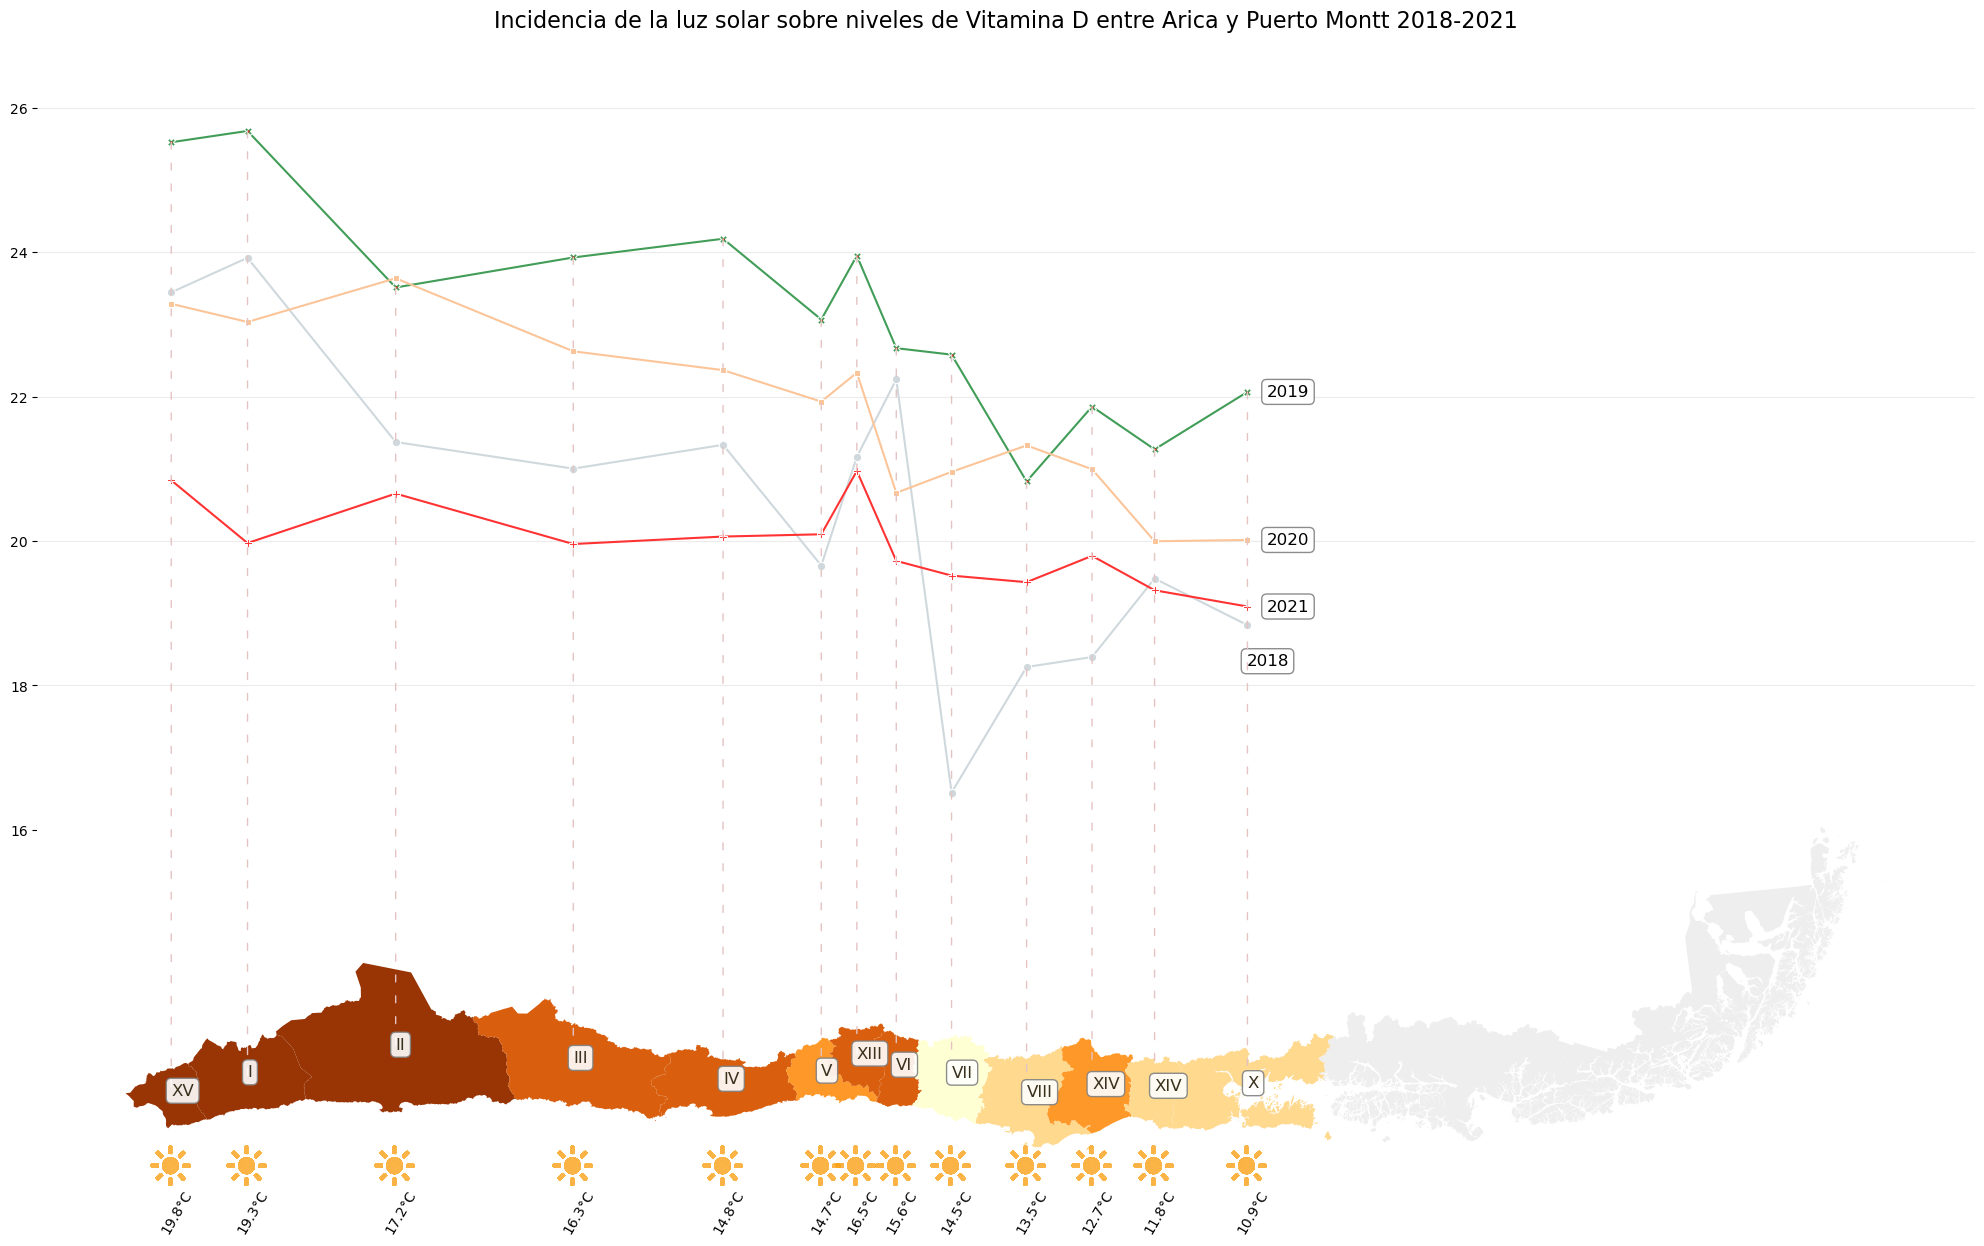

In [17]:
image_ = image.imread('../shape_chile/sol.png')
imagebox = OffsetImage(image_, zoom = 0.05)
fig, ax = plt.subplots(2,1, figsize=(25,18), sharex='all', gridspec_kw={'hspace': -.4})

ax[0]=sns.lineplot(
    data= data_plot,
    x='X',
    y='Promedio',
    hue='Año',
    ax=ax[0],
    markers=True,
    dashes=False,
    style='Año',
    palette=color_anios,
    legend=False,

    
)
ax[0].set_title("Incidencia de la luz solar sobre niveles de Vitamina D entre Arica y Puerto Montt 2018-2021", fontsize=16)
ax[0].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set(ylabel=None)
ax[0].set(xlabel=None)
# x_min, x_max = ax[0].get_xlim()
# ax[0].set_xlim(x_min,x_max+4)




# chile_pol[~chile_pol['codreg'].isin([12,11])].plot(column='MacroZona', 
chile_pol.plot(
    column='promedio_vitamina_d', 
    #categorical=True,
    ax=ax[1],
    # color=chile_pol[~chile_pol['codreg'].isin([12,11])]['categorias'],    
    color=chile_pol['categorias'],    
    # column='promedio_vitamina_d',
    # scheme = 'Fisher_Jenks',
    # k=5,
     # scheme='Fisher_Jenks',
    # cmap='Oranges_r',
    legend=True
   

)



ax[0].set_ylim(15,27)
y_limin,ylimax= ax[1].get_ylim()
# ax[1].set_ylim(y_limin-1,ylimax)

label_anios = data_plot.loc[data_plot.codreg==10,['Año','codreg','Promedio','X','Y']].reset_index()
for i in range(len(label_anios)):
    # print((label_anios.loc[i,'X'],label_anios.loc[i,'Promedio']))
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
   
    if label_anios.loc[i,'Año']==2018:
        ax[0].text(label_anios.loc[i,'X']+49000,label_anios.loc[i,'Promedio']-.5, str(label_anios.loc[i,'Año']), ha="center", va="center", size=12,
        bbox=bbox_props)
    else:
        ax[0].text(label_anios.loc[i,'X']+99000,label_anios.loc[i,'Promedio'], str(label_anios.loc[i,'Año']), ha="center", va="center", size=12,
        bbox=bbox_props)

anio_ = 2019
for xpy in zip(data_plot[data_plot['Año']==anio_]['X'],data_plot[data_plot['Año']==anio_]['Promedio'],data_plot[data_plot['Año']==anio_]['Y'],temperaturas_prom['promedio_temp'],data_plot[data_plot['Año']==anio_]['romanos']):
    # print(xpy[0], xpy[0]-1000)
    ax[0].plot(xpy[0],xpy[1],'ro',markersize=.5)   
    # ax[1].plot(xpy[0],xpy[2],'ro',markersize=8)   
    ax[1].text(xpy[0],xpy[2],s=xpy[4], size=12, color='#39311d', bbox=bbox_props)#, fontweight='bold', )
    ax[1].text((xpy[0]-29999),5545389.992777139,s=f'{xpy[3]:.1f}°C', rotation=60)
    #ax[1].text((xpy[0]-29999),6632454.265839104,s=f'{xpy[3]:.1f}°C', rotation=45)
    ab = AnnotationBbox(imagebox, (xpy[0], 5706728.349250345), frameon = False)
    ax[1].add_artist(ab)
    # print(xpy[2]-399999)
    # ax[1].text(xpy[0],xpy[2]-299999, s='AAAAA')
    
    con = ConnectionPatch(xyA=(xpy[0],xpy[1]), xyB=(xpy[0],xpy[2]), coordsA="data", coordsB="data",
          axesA=ax[0], axesB=ax[1], color="#E5C3C3", linestyle=(0, (5, 10)))
    ax[1].add_artist(con)  
    # print(i)


# ax[0].set(xlabel=)
# ax[0].get_xaxis().set_visible(True)
ax[1].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

# ax[1].get_yaxis().set_visible(True)
# ax[1].axis('off')
# ax[0].axis('on')sol

ax[0].grid(axis='y', color='#ECECEC')

# leg = ax[1].get_legend()
# print(leg)
# leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))
# ax.set_axis_off()
# plt.tight_layout()
plt.show()

## IV. Exámenes por año de Vitamina D y sus resultados por estación y rango de edad.

In [18]:
## Funciones a ocupar
def agregar_proporcion(grupo):    
    grupo["PROP"] = grupo['VITAMINA D'] / grupo['VITAMINA D'].sum()
    return grupo
    
def condicion(x):
    x=int(x)
    if x<30:
        return "Deficiente"
    else:
        return "Deseable"


def update_treemap(tipo,zona):
  global df_filter  
 
  if zona !="ALL":
    df = df_filter.query(f"MACROZONA == '{zona.upper()}'")
  else:
    df = df_filter
    
  if tipo =="MEAN":
    val='VITAMINA_D_AVG'
    txt="GRAFICO TREEMAP - MEAN VITAMINA D"
  else:
    val='VITAMINA_D_TOT'
    txt="GRAFICO TREEMAP - SIZE VITAMINA D"
  
  

  fig = px.treemap(df, values=val,path = [px.Constant(txt),'AÑO','MACROZONA','ESTACIONES_AÑO','VIT_D_TXT'],
                color='VIT_D_TXT', 
                color_discrete_map={'Deficiente':'#ce281f',
                                     'Deseable':'#8eef44'}                
                 )
  cm = {txt:"#f2f6fa"}

  fig.for_each_trace(
    lambda t: t.update(
        marker_colors=[
            cm[id.split("/")[0]] if len(id.split("/")) == 1 else c
            for c, id in zip(t.marker.colors, t.ids)
          ]        
      )
    )
  
  cm = {
    "2018":"#ec722e",
    "2019":"#7dc343",
    "2020":"#64a2d8",
    "2021":"#eed842"
  }

  fig.for_each_trace(
    lambda t: t.update(
        marker_colors=[
            cm[id.split("/")[1]] if len(id.split("/")) == 2 else c
            for c, id in zip(t.marker.colors, t.ids)
          ]        
      )
    )

  cm = {
    "NORTE": "#e6dc77",
    "CENTRO": "#b8d6b1",
    "SUR": "#64aee5"
  }

  fig.for_each_trace(
    lambda t: t.update(
        marker_colors=[
            cm[id.split("/")[2]] if len(id.split("/")) == 3 else c
            for c, id in zip(t.marker.colors, t.ids)
          ]        
      )
    )

  cm = {
    "PRIMAVERA": "Green",
    "VERANO": "#F5761A",
    "OTOÑO": "Brown",
    "INVIERNO": "#6082B6"
  }
  fig.for_each_trace(
    lambda t: t.update(
        marker_colors=[
            cm[id.split("/")[3]] if len(id.split("/")) == 4 else c
            for c, id in zip(t.marker.colors, t.ids)
          ]        
      )
    )

  fig.update_layout(margin = dict(t=25, l=25, r=25, b=25)) 

  fig.update_layout(   
    template="plotly_white",
    height = 900
  )

  fig.update_traces(textinfo="label+percent parent") 
  fig.data[0]['textfont']['size'] = 14
  fig.show() 

def update_sunburts(tipo,year):
  global df_filter
  
  if tipo =="MEAN":
    val='VITAMINA_D_AVG'
    txt="GRAFICO SUNBURST - MEAN DE VITAMINA D"
  else:
    val='VITAMINA_D_TOT'
    txt="GRAFICO SUNBURST - SIZE DE VITAMINA D"
    
  if year !="ALL":
    df = df_filter.query(f"AÑO == {year}")
  else:
    df = df_filter
    
  fig2 = px.sunburst(df, path=['AÑO',"VIT_D_TXT", 'ADULTO_NIÑO'], values=val)
  
  colores={"Adulto":"#caccd1",
  "Niño":"#00a4e4",
  "Deficiente":"#ce281f",
  "Deseable":"#8eef44",
  "2018":"#ec722e",
  "2019":"#7dc343",
  "2020":"#64a2d8",
  "2021":"#eed842"}

  for t in fig2.data:
    lista = t.labels
    lista_p = t.parents

  colors = []

  for p in range(0,len(lista)):
    if len(lista_p[p].split("/"))==2:
      colors.append(colores[lista_p[p].split("/")[1]])
    else: 
      colors.append(colores[lista[p]])

  fig = go.Figure(go.Sunburst(
        labels=fig2['data'][0]['labels'],
        parents=fig2['data'][0]['parents'],
        values=4*fig2['data'][0]['values'],
        ids=fig2['data'][0]['ids'],
        branchvalues='total',
        marker=dict(colors=colors),
        hovertemplate='<b>%{label}:</b> <br> Total : %{value} <extra></extra>',
        maxdepth=3
      ))
  
  fig.update_layout(   
    template="plotly_white",
        title={
        'text': "NIVELES DE VITAMINA D MEDIDOS PRE Y DURANTE COVID"
        },
    height = 900     
    )
  fig.data[0]['textfont']['size'] = 14
  fig.update_traces(textinfo="label+percent parent") 

  fig.show()

In [13]:
data.columns = data.columns.str.upper()
data['RESULTADO_VAL']= 1
data['VIT_D_TXT'] = data['VITAMINA D'].apply(condicion)


df_filter=data[['AÑO','LABORATORIO','ADULTO_NIÑO','MACROZONA','ESTACIONES_AÑO','VITAMINA D','RESULTADO_VAL','VIT_D_TXT']]

df_filter=df_filter.groupby(['AÑO','LABORATORIO','ADULTO_NIÑO','MACROZONA','ESTACIONES_AÑO','VIT_D_TXT']).agg({'VITAMINA D':'mean', 'RESULTADO_VAL':'size'}) \
       .rename(columns={'VITAMINA D':'VITAMINA_D_AVG','RESULTADO_VAL':'VITAMINA_D_TOT'}) \
       .reset_index()

### La preocupación mundial por la deficiencia de vitamina D ha ido en aumento y se le ha dado mayor importancia a la exposición solar para satisfacer los requisitos de vitamina D. Esto revirtió mayor importancia en período pandemia, lo que produjo un aumento de exámenes solicitados por este concepto. El laboratorio pasó de revisar 28.000 exámenes de Vitamina D el año 2018 a 90.000 el año 2021. 
### En el Treemap está el detalle de estos datos y los resultados arrojados por estación del año donde "Deficiente" es con un resultado de Vitamina D bajo 30 ng/dL y "Deseable" sobre 30 ng/dL.

In [14]:
#Treemap
dropdown_avg_tot = widgets.Dropdown(
    value='SIZE', 
    options=['SIZE'], 
    description='VITAMINA D :'
)


dropdown_zona = widgets.Dropdown(
    value='ALL', 
    options=['ALL','Norte', 'Centro', 'Sur'], 
    description='Zona :'
)

widgets.interact(update_treemap, tipo = dropdown_avg_tot, zona=dropdown_zona) 

interactive(children=(Dropdown(description='VITAMINA D :', options=('SIZE',), value='SIZE'), Dropdown(descript…

<function __main__.update_treemap(tipo, zona)>

### La deficiencia de Vitamina D en todo el territorio nacional es importante, en el sunburst se puede apreciar que la pandemia acentuó aún más a la baja estos niveles, llegando a un pic de deficicencia de Vitamina D el año 2021 con un 87% de los resultados, sólo el 13% de la muestra de la población alcanza un resultado deseable. 

In [15]:
#Sunburts
dropdown_año = widgets.Dropdown(
    value='ALL', 
    options=['ALL','2018', '2019', '2020', '2021'], 
    description='Año :'
)

dropdown_avg_tot = widgets.Dropdown(
    value='SIZE', 
    options=['SIZE'], 
    description='VITAMINA D :'
)

widgets.interact(update_sunburts, tipo=dropdown_avg_tot, year = dropdown_año)

interactive(children=(Dropdown(description='VITAMINA D :', options=('SIZE',), value='SIZE'), Dropdown(descript…

<function __main__.update_sunburts(tipo, year)>

## V. Conclusión
### En nuestro país hay presencia de varios de los factores que inciden en bajas concentraciones de Vitamina D. Vivir en una zona alejada de la línea del Ecuador conlleva a una escasa exposición solar en todo el territorio nacional. Lo anterior se vincula al alto número de horas en actividades sedentarias bajo techo, además del exceso de abrigo, nubosidad, contaminación del aire, uso diario de bloqueador solar y menor síntesis de vitamina en población que vive en latitudes mayores a 35 grados Norte o Sur donde la llegada de rayos UVB es mínima, especialmente en otoño e invierno. Por este motivo, encontrar niveles deficientes en todos los años de medición era esperable. La pandemia afectó negativamente los niveles como se pudo apreciar en detalle en el sunburst.